# Data Analysis

For understanding the bibliographic catalogue data of the Swissbib platform, the project team has generated a sample .json file with a big amount of representative records. This chapter shows the analysis of this data delivery.

## Table of Contents

- [Sample Records Analysis](#Sample-Records-Analysis)
    - [Book](#Book)
    - [Music](#Music)
    - [Video Material](#Video-Material)
    - [Map](#Map)
    - [Periodical](#Periodical)
    - [Collection](#Collection)
    - [Computer File](#Computer-File)
- [General Observation](#General-Observation)
- [Attribute Analysis](#Attribute-Analysis)
    - [Table of Contents of Attribute Analysis](#Table-of-Contents-of-Attribute-Analysis)
- [Metadata Handover](#Metadata-Handover)
- [Summary](#Summary)

## Sample Records Analysis

In this section, the data file is loaded and some sample data records are shown.

In [1]:
import os
import json

records = []
path_data = './data'
path_goldstandard = './daten_goldstandard'

for line in open(os.path.join(path_data, 'job7r4A1.json'), 'r'):
    records.append(json.loads(line))

print('Number of data records loaded', len(records))

Number of data records loaded 183407


In [2]:
import pandas as pd

# Generate Pandas DataFrame object out of the raw data
df = pd.DataFrame(records)

# Extend display to number of columns of DataFrame
pd.options.display.max_columns = len(df.columns)

df.head()

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,edition,part,pages,volumes,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '245c': ['André S...",{},1992,1992,1992,1992,,[],[S. 102-114],[S. 102-114],[],[],,[],[],[],,[BK020000]
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '245c': ['von Werne...",{},1986,1986,1986,1986,,[],[43 S.],[43 S.],[],[],,[],[],[],,[BK020000]
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...",{},1923,1923,1923,1923,,[],[75 p.],[75 p.],[],[],,[],[],[],,[BK020000]
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '245c': ['']}",{},1947,1947,1947,1947,,[],[24 S.],[24 S.],[],[],,[],[],[],,[BK020000]
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '245c': ['Urs Oberlin ...",{},1991,1991,1991,1991,,[],[p. 14-15],[p. 14-15],[],[],,[],[],[],,[BK020000]


In [3]:
print('Number of records {:d}, number of attributes per record {:d}.\n'.format(
    len(df), len(df.columns)))

df.info()

Number of records 183407, number of attributes per record 23.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183407 entries, 0 to 183406
Data columns (total 23 columns):
docid         183407 non-null object
035liste      183407 non-null object
isbn          183407 non-null object
ttlfull       183407 non-null object
ttlpart       183407 non-null object
person        183407 non-null object
corporate     183407 non-null object
pubyear       183407 non-null object
decade        183407 non-null object
century       183407 non-null object
exactDate     183407 non-null object
edition       183407 non-null object
part          183407 non-null object
pages         183407 non-null object
volumes       183407 non-null object
pubinit       183407 non-null object
pubword       183407 non-null object
scale         183407 non-null object
coordinate    183407 non-null object
doi           183407 non-null object
ismn          183407 non-null object
musicid       183407 non-null object
format      

Swissbib data describes different kinds of bibliographic units, see [format](#format). The following subsections show some sample data for such units. The format is interpreted roughly in these subsections, compare Swissbib's [format codes](http://www.swissbib.org/wiki/index.php?title=Filtering#format_codes) [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [4]:
df.format.str[0].str[:2].unique()

array(['BK', 'MU', 'VM', 'MP', 'CR', 'CL', 'CF', nan], dtype=object)

### Book

A format code starting with $\texttt{BK}$ stands for a bibliographic unit of a book or an article. A sample record is shown below.

In [5]:
df.loc[df[df.format.str[0].str[:2]=='BK'].index[0]]

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '245c': ['André S...
corporate                                                    {}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 102-114]
volumes                                            [S. 102-114]
pubinit                                 

### Music

A format code starting with $\texttt{MU}$ stands for a bibliographic unit that is related to music. A sample record is shown below.

In [6]:
df.loc[df[df.format.str[0].str[:2]=='MU'].index[0]]

docid                                                 554098806
035liste                  [(OCoLC)1085495414, (IDSBB)007052696]
isbn                                                         []
ttlfull                             {'245': ['Violin sonatas']}
ttlpart                             {'245': ['Violin sonatas']}
person        {'100': ['BrahmsJohannes1833-1897(DE-588)11851...
corporate                                                    {}
pubyear                                                20182018
decade                                                     2018
century                                                    2018
exactDate                                              20182018
edition                                                        
part                                                         []
pages                                            [1 CD (69:42)]
volumes                                          [1 CD (69:42)]
pubinit                                 

### Video Material

A format code starting with $\texttt{VM}$ represents some film material. A sample record is shown below.

In [7]:
df.loc[df[df.format.str[0].str[:2]=='VM'].index[0]]

docid                                                 554098911
035liste      [(OCoLC)1065768412, (IDSBB)007052702, (OCoLC)1...
isbn                         [978-3-946274-20-9, 3-946274-20-X]
ttlfull       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
ttlpart       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
person        {'100': [], '700': ['SchlingensiefChristoph196...
corporate                                                    {}
pubyear                                                20182008
decade                                                     2018
century                                                    2018
exactDate                                              20182008
edition                                                        
part                                                     [2004]
pages                                  [2 DVD-Videos (283 min)]
volumes                                [2 DVD-Videos (283 min)]
pubinit                                 

### Map

A format code starting with $\texttt{MP}$ is a map. A sample record is shown below.

In [8]:
df.loc[df[df.format.str[0].str[:2]=='MP'].index[0]]

docid                                                 554099039
035liste                  [(OCoLC)1085495396, (IDSBB)007052708]
isbn                                                         []
ttlfull       {'245': ['Nova descriptio Comitatus Hollandiæ'...
ttlpart       {'245': ['Nova descriptio Comitatus Hollandiæ'...
person        {'100': ['BlaeuWillem Janszoon1571-1638(DE-588...
corporate                                                    {}
pubyear                                                19931604
decade                                                     1993
century                                                    1993
exactDate                                              19931604
edition                                               Facsimile
part                                                         []
pages                                                 [1 Karte]
volumes                                               [1 Karte]
pubinit                                 

### Periodical

A format code starting with $\texttt{CR}$ is a bibliographic unit of a periodical. A sample record is shown below.

In [9]:
df.loc[df[df.format.str[0].str[:2]=='CR'].index[0]]

docid                                                 55409939X
035liste                   [(OCoLC)699516877, (IDSBB)007052728]
isbn                                                [1533-4406]
ttlfull       {'245': ['The new England journal of medicine ...
ttlpart       {'245': ['The new England journal of medicine ...
person                                {'100': [], '245c': ['']}
corporate                                                    {}
pubyear                                                18121826
decade                                                     1812
century                                                    1812
exactDate                                              18121826
edition                                                        
part                                                         []
pages                                        [Online-Ressource]
volumes                                      [Online-Ressource]
pubinit                                 

### Collection

A format code starting with $\texttt{CL}$ is a collection. A sample record is shown below.

In [10]:
df.loc[df[df.format.str[0].str[:2]=='CL'].index[0]]

docid                                                 554101610
035liste                  [(OCoLC)1085510940, (IDSBB)007052979]
isbn                                                         []
ttlfull       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
ttlpart       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
person                                {'100': [], '245c': ['']}
corporate               {'110': ['St. Gallischer Hilfsverein']}
pubyear                                                20179999
decade                                                     2017
century                                                    2017
exactDate                                              20179999
edition                                                        
part                                                         []
pages                                                 [1 Mappe]
volumes                                               [1 Mappe]
pubinit                                 

### Computer File

A format code starting with $\texttt{CF}$ is a placeholder for a computer file on any kind of storage. A sample record is shown below.

In [11]:
df.loc[df[df.format.str[0].str[:2]=='CF'].index[0]]

docid                                                 554144301
035liste                   [(IDSBB)007008154, (RERO)R007245313]
isbn                                                         []
ttlfull       {'245': ['Ice Age 4', 'voll verschoben : die a...
ttlpart       {'245': ['Ice Age 4', 'voll verschoben : die a...
person                                {'100': [], '245c': ['']}
corporate                                                    {}
pubyear                                                2012    
decade                                                     2012
century                                                    2012
exactDate                                              2012    
edition                                                        
part                                                         []
pages                                         [1 Speicherkarte]
volumes                                       [1 Speicherkarte]
pubinit                                 

## General Observation

As can be observed in the sample records displayed above, the attributes of the records are stored in basic Python datatypes like strings, lists (of strings), and dictionaries. A look into the raw data file confirms this observation.

In [12]:
! head -n 2 ./data/job7r4A1.json

{"docid":"554061449","035liste":["(OCoLC)1085491204","(IDSBB)006899773"],"isbn":[],"ttlfull":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"ttlpart":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"person":{"100":["SchluchterAndré"],"245c":["André Schluchter"]},"corporate":{},"pubyear":"1992    ","decade":"1992","century":"1992","exactDate":"1992    ","edition":"","part":[],"pages":["S. 102-114"],"volumes":["S. 102-114"],"pubinit":[],"pubword":[],"scale":"","coordinate":[],"doi":[],"ismn":[],"musicid":"","format":["BK020000"]}
{"docid":"554061481","035liste":["(OCoLC)1085491341","(IDSBB)006899983"],"isbn":[],"ttlfull":{"245":["Reimereien"]},"ttlpart":{"245":["Reimereien"]},"person":{"100":["NaegeliWerner"],"245c":["von Werner Naegeli"]},"corporate":{},"pubyear":"1986    ","decade":"1986","century":"1986","exactDate":"1986    ","edition":"","part":[],"pag

A specific analysis on each attribute, its meaning and contents will be done as a next step. For the upcoming analysis, each attribute of the data records is assigned to its specific group type. This is done with the help of a global dictionary variable $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$.

In [13]:
columns_metadata_dict = {}

## Attribute Analysis

This section analyses the attributes provided by the Swissbib data extracts. The extracted data is used as a basis for the machine learning models in the capstone project. The attributes are based on the MARC 21 Format for Bibliographic Data [[MARC](./A_References.ipynb#marc21)] and are documented on a Swissbib wikipedia page [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [14]:
df.columns

Index(['docid', '035liste', 'isbn', 'ttlfull', 'ttlpart', 'person',
       'corporate', 'pubyear', 'decade', 'century', 'exactDate', 'edition',
       'part', 'pages', 'volumes', 'pubinit', 'pubword', 'scale', 'coordinate',
       'doi', 'ismn', 'musicid', 'format'],
      dtype='object')

This section provides and uses some functions that have been written for supporting the analysis of the attributes as well as for data preprocessing in the upcoming chapters. These functions have been defined in separate code files.

- [data_analysis_funcs.py](./data_analysis_funcs.py)
- [data_preparation_funcs.py](./data_preparation_funcs.py)

In [15]:
import data_analysis_funcs as daf
import data_preparation_funcs as dpf

### Table of Contents of Attribute Analysis

- [035liste](#035liste)
- [century](#century)
- [coordinate](#coordinate)
- [corporate](#corporate)
- [decade](#decade)
- [docid](#docid)
- [doi](#doi)
- [edition](#edition)
- [exactDate](#exactDate)
- [format](#format)
- [isbn](#isbn)
- [ismn](#ismn)
- [musicid](#musicid)
- [pages](#pages)
- [part](#part)
- [person](#person)
- [pubinit](#pubinit)
- [pubword](#pubword)
- [pubyear](#pubyear)
- [scale](#scale)
- [ttlfull](#ttlfull)
- [ttlpart](#ttlpart)
- [volumes](#volumes)

In [16]:
columns_metadata_dict['data_analysis_columns'] = []

### 035liste

In [17]:
columns_metadata_dict['list_columns'] = ['035liste']

Attribute $\texttt{035liste}$ holds a list of identifiers from the originating library of a bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Each record of the Swissbib data holds at least one identifier. Some examples are shown below.

In [18]:
daf.find_empty_in_column(df, columns_metadata_dict, '035liste')

Number of records with filled 035liste 183407, with missing 035liste 0 => 100.0%


In [19]:
df['035liste'].apply(lambda x : len(x)).sort_values().head(5)

83463     1
150669    1
150668    1
150667    1
150666    1
Name: 035liste, dtype: int64

In [20]:
df['035liste'].apply(lambda x : len(x)).sort_values().tail(10)

144185    20
54084     21
30793     21
136608    21
61603     21
14755     21
49974     22
139972    22
139191    23
124359    23
Name: 035liste, dtype: int64

In [21]:
print('Some sample identifiers:')
df['035liste'].sample(n=10)

Some sample identifiers:


78886                 [(OCoLC)1085684592, (NEBIS)011319386]
164181                                         [(CEO)41405]
58813     [(IDSBB)007058009, (SGBN)001436549, (NEBIS)011...
45224        [(SERSOL)ssib034367136, (WaSeSS)ssib034367136]
112089    [(SNL)991017950010203976, (Sz)991017950010203976]
128753    [(SERSOL)ssib029758599, (VAUD)9910211262919028...
123588                           [(SERVAL)BIB_B23B657B4923]
90453     [(VAUDS)991002864852302853, (EXLNZ-41BCULAUSA_...
64100     [(OCoLC)907300783, (IDSBB)007059900, (OCoLC)90...
173256    [(VAUD)991018821209702852, (CEO)76511, (RNV)00...
Name: 035liste, dtype: object

Attribute $\texttt{035liste}$ is the central attribute for finding duplicates in the training data of the Swissbib's goldstandard. This process will be explained and implemented in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### century

In [22]:
columns_metadata_dict['strings_columns'] = ['century']

In [23]:
daf.find_empty_in_column(df, columns_metadata_dict, 'century')

Number of records with filled century 183407, with missing century 0 => 100.0%


Attribute $\texttt{century}$ holds strings of length 4 that can predominantly be interpreted as year-dates [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples and the top-most quantity distribution are shown below.

In [24]:
df['century'].sample(n=15)

158076    2017
9068      2008
155386    1908
138267    2018
57258     1740
52161     2018
1409      1859
7245      1993
87427     2018
129587    1906
116438    1884
162385    2008
127458    2018
81715     2005
94603     2018
Name: century, dtype: object

In [25]:
df.century.value_counts(normalize=True).head(10)

2018    0.208389
2019    0.086785
2017    0.046350
uuuu    0.036236
2016    0.025223
1999    0.020201
2015    0.019879
2014    0.018156
2012    0.016286
2013    0.015616
Name: century, dtype: float64

If the year-date is unclear to some extent or no year-date of the unit is registered, letter 'u' is used as a placeholder of the unknown digit.

In [26]:
df.century[df.century.str.contains('u')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The above statement results in the same array like the following regular expression.

In [27]:
df.century[df.century.str.contains('[^0-9]')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

In [28]:
df.century[~df.century.str.contains('[u]')].unique()

array(['1992', '1986', '1923', '1947', '1991', '1967', '1950', '1985',
       '1983', '1942', '1883', '1990', '1984', '1989', '1993', '1961',
       '1940', '1981', '1988', '1858', '1978', '1977', '1880', '1945',
       '1963', '1912', '1884', '1937', '1956', '1943', '1916', '1960',
       '1980', '1936', '1906', '1987', '1955', '1944', '1953', '1930',
       '1903', '1913', '1938', '1895', '1905', '1920', '1918', '1857',
       '1928', '1881', '1932', '1900', '1924', '1915', '1931', '1927',
       '1919', '1896', '1922', '1871', '1926', '1939', '1907', '1776',
       '1873', '1893', '1968', '1975', '1946', '1833', '1855', '1949',
       '1962', '1971', '1959', '1966', '1862', '1898', '1901', '1904',
       '1902', '1951', '1909', '1929', '1921', '1882', '1964', '1911',
       '1957', '1897', '1910', '1867', '1914', '1908', '1958', '1934',
       '1933', '1872', '1845', '1979', '1954', '1885', '1810', '1891',
       '1869', '1876', '1889', '1836', '1952', '1935', '1948', '1917',
      

The following graph shows the publishing activity of Western European literature. Be aware that the displayed data is only an extract of the full Swissbib data, though.

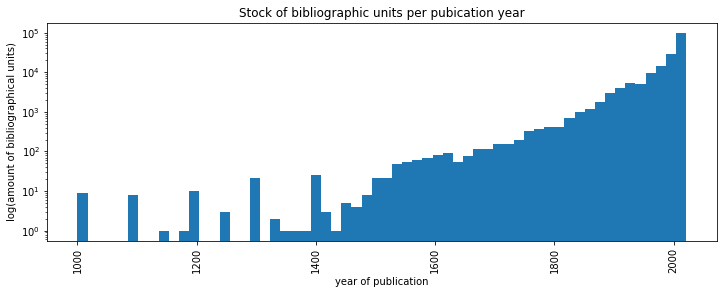

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

plt.hist(df.century[~df.century.str.contains('[u]')].astype(int), bins=60, log=True)
plt.xticks(rotation='vertical')
plt.title('Stock of bibliographic units per pubication year')
plt.xlabel('year of publication')
plt.ylabel('log(amount of bibliographical units)')
plt.show()

With its data extract [[SwRe](./A_References.ipynb#swre)], Swissbib forwards the year of publication of a bibliographic unit in attribute $\texttt{century}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)], if the bibliographic unit has been published in a specific year as may be the case for a regular book. If the bibliographic unit has been published during a time period, like for example a periodical, the first year of publication is stored [[WiCo2001](./A_References.ipynb#wico2001)].

In Swissbib's deduplication implementation, the attribute has a different meaning, though, holding the century of publication instead of its full year [[WiCo2001](./A_References.ipynb#wico2001)]. The data extract offers with $\texttt{decade}$ an additional attribute holding the same data as $\texttt{century}$. Even more, attributes $\texttt{exactDate}$ and $\texttt{pubyear}$ offer an extended version of attribute $\texttt{century}$. Due to these redundancies, the attribute will be dropped for the feature matrix and one of the extended attributes with the same data will be taken into account, see below.

In [30]:
#columns_metadata_dict['data_analysis_columns'] = ['century']

### coordinate

In [31]:
columns_metadata_dict['list_columns'] = ['coordinate']

Attribute $\texttt{coordinate}$ holds geographical coordinate information on the related bibliographical unit of format map.

In [32]:
daf.find_empty_in_column(df, columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 730, with missing coordinate 182677 => 0.4%


In [33]:
daf.find_empty_in_column(df[df.format.str[0].str[:2]=='MP'], columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 729, with missing coordinate 183 => 79.9%


In [34]:
df['coordinate'][df.format.str[0].str[:2]=='MP'].sample(n=10)

72537                       []
114849    [E0063320, N0464357]
15758     [E0063627, N0463511]
27618     [E0114700, N0513600]
52608     [E0105400, N0493700]
57097     [E0840000, N0310000]
11950     [W1800000, N0900000]
115809    [E0055415, N0474821]
114689    [E0085107, N0470615]
35887     [E0132800, N0463400]
Name: coordinate, dtype: object

The attribute stores its values in the form of a list. The list may hold more than two specific coordinate values. A specific coordinate value is mostly of length 8 characters.

In [35]:
df_maps = df.loc[df.coordinate.apply(lambda x : len(x))[df.format.str[0].str[:2]=='MP'].index]
df_maps.coordinate[df_maps.coordinate.apply(lambda x : len(x)) > 2].sample(n=10)

133537    [E0070205, E0070202, N0463814, N0463809]
138344    [E0053613, E0053623, N0475929, N0475919]
131800    [E0072815, E0072819, N0460829, N0460834]
83161     [E0073547, E0073544, N0465345, N0465341]
145722    [E0071437, E0071441, N0462126, N0462130]
20694     [E0073306, E0073408, N0471208, N0471158]
132971    [E0073924, E0073928, N0465238, N0465239]
137877    [E0102620, E0102615, N0463834, N0463830]
57054     [E0203500, E0201900, N0383100, N0383100]
135681    [E0083706, E0083706, N0470000, N0470001]
Name: coordinate, dtype: object

In [36]:
df.coordinate.loc[15139][0] + ' transforms to ' + df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E012.500000 transforms to E0125000'

In [37]:
df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E0125000'

Attribute $\texttt{coordinate}$ is a relevant identifying attribute for duplicates of maps. The attribute will be used for pair comparison in the feature matrix. The format of its filled list is slightly complicated, though. The contents of the field will be transformed with the help of a function $\texttt{split}\_\texttt{coordinate()}$, [[WiCo2001](./A_References.ipynb#wico2001)].

In [38]:
df = dpf.split_coordinate(df)

The function extracts the first element of the list starting with letter 'E' for East or 'W' for West. It then normalizes the string to a string of length 8, removing all '.' and ' ' characters beforehand. The resulting string element is stored in a new attribute $\texttt{coordinate_E}$.

In [39]:
df.coordinate_E[df.coordinate_E.apply(lambda x : x!='')].sample(n=20)

56851     e0072304
142009    e0123000
28325     e0085948
48027     w1183500
72532     e0080138
20729     e0073622
15072     e0055503
131853    e0094625
59291     e0072600
114771    e0063958
106167    e0101300
13892     e0120000
145721    e0053832
18197     e0073215
29684     w0003700
114774    e0063958
57062     e0193500
137458    e0090349
3837      e0071900
113771    e0091904
Name: coordinate_E, dtype: object

As a next step, the same procedure is done with the first list element starting with letter 'N' for North or 'S' for South. The resulting string element is stored in a new attribute $\texttt{coordinate_N}$.

In [40]:
df.coordinate_N[df.coordinate_N.apply(lambda x : x!='')].sample(n=20)

102808    n0711000
126812    n0465703
48993     n0444200
5032      n0602000
182751    n0465035
111780    n0463248
59859     n0470417
18181     n0460254
35091     n0473313
81954     n0465800
73837     n0900000
134735    n0464659
113698    n0470935
110574    n0420000
25072     n0561200
78675     n0555500
114821    n0470010
54214     n0472342
126762    n0464043
114688    n0470615
Name: coordinate_N, dtype: object

In [41]:
print('East / west coordinates? ', df.coordinate_E.str[0].unique())
print('North / south coordinates? ', df.coordinate_N.str[0].unique())

East / west coordinates?  [nan 'e' 'w']
North / south coordinates?  [nan 'n' 's']


Both new attributes are used for further processing, while the original attriubte $\texttt{coordinate}$ is dropped.

In [42]:
columns_metadata_dict['data_analysis_columns'].append('coordinate_E')
columns_metadata_dict['data_analysis_columns'].append('coordinate_N')

### corporate

In [43]:
columns_metadata_dict['strings_columns'].append('corporate')

Attribute $\texttt{corporate}$ is a collection of corporate names of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data comes along as a dictionary column in the DataFrame with three possible key value pairs. For reasons of easier processing, attribute $\texttt{corporate}$ will be split into a separate attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [44]:
df.corporate.sample(n=20)

101659                                                   {}
142975                    {'710': ['Bertelsmann-Stiftung']}
102678                                                   {}
114911                                                   {}
30826                                                    {}
34918                                                    {}
13385                                                    {}
102940                                                   {}
166180    {'110': ['Comité international de sociologie d...
25691                                                    {}
109025                                                   {}
49497                                                    {}
430                                                      {}
69274                                                    {}
84169                                                    {}
72081                                                    {}
73542                                   

In [45]:
for ending in ['110', '710', '810']:
    df = dpf.transform_dictionary_to_list(df, 'corporate', ending)
    df = dpf.transform_list_to_string(df, 'corporate_'+ending)

    columns_metadata_dict['strings_columns'].append('corporate_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'corporate_'+ending)

Number of records with filled corporate_110 11370, with missing corporate_110 172037 => 6.2%
Number of records with filled corporate_710 23123, with missing corporate_710 160284 => 12.6%
Number of records with filled corporate_810 57, with missing corporate_810 183350 => 0.0%


The attribute is sparsely filled. This is due to the fact that most of Swissbib's bibliographical units are units produced by persons, not corporates.

In [46]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    11349
corporate_710    11349
dtype: int64

In [47]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110==df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    21
corporate_710    21
dtype: int64

In [48]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0) &
    (df.corporate_710.apply(lambda x : len(x))!=0)
].head()

,corporate_110,corporate_710
10383,"verein deutscher bibliothekare, regionalverban...","verein deutscher bibliothekare, zentral- und l..."
14064,slavs and tatars,"kunsthalle im lipsiusbau, kunstverein hannover"
14918,"heilsarmee, nationales hauptquartier bern","salvation army, nationales hauptquartier"
15687,berner alpenbahn-gesellschaft bern-lötschberg-...,lötschbergbahn
16185,jordan schnitzer family foundation,hallie ford museum of art


The attribute holds different data in its dictionary key 110 compared to its dictionary key 710. Both key values of $\texttt{corporate}$ seem to be relevant for the model. Some examples are shown below.

In [49]:
df.corporate_110[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20)

156116    mediterranean games. organizing committee. 8, ...
158503    olympic winter games. organizing committee. 22...
151112    summer olympic games. organizing committee. 22...
165472                     fédération internationale de ski
165959                           olympic council of ireland
155901    olympic winter games. organizing committee. 22...
160027    international olympic committee. evaluation co...
167737    olympic winter games. organizing committee. 23...
151336                  republic of china olympic committee
164855                                            doha 2016
170349    mediterranean games. organizing committee. 6, ...
102410                   elektrizitätswerk der stadt zürich
92482                                      montres rolex sa
167640    musée olympique (lausanne). unité programmes c...
153813    olympic winter games. organizing committee. 22...
151053    summer olympic games. organizing committee. 25...
166948    general assembly of the intern

In [50]:
df.corporate_710[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20)

18062           eidgenössische technische hochschule zürich
24466        nederlandse kring voor wetenschap der politiek
20731                        eidgenössische finanzkontrolle
19131                      technische universität (dresden)
62541     jura (canton), bern (kanton), bau-, verkehrs- ...
2377                                            the beloved
101907                                     canal 9 (sierre)
37028     mineralogical society of america, accademia na...
6629      kungliga hovkapellet, kungliga filharmonikerna...
175616    vuokatti sports institute, international congress
58206                                 atelier otto rietmann
175495    nations unies, office of sport for development...
96115                        benjamin knecht jazz orchestra
93519                         parti socialiste neuchâtelois
12981                                             gupfbuebä
72933              österreichische galerie belvedere (wien)
174720    american chemical society, div

In [51]:
df.corporate_810[df.corporate_810.apply(lambda x : len(x))!=0].sample(n=20)

17859     schweiz, bundesamt für landestopografie
53969     schweiz, bundesamt für landestopografie
110582                    hallwag kümmerly + frey
104811                        usa, war department
52134             kunsthandlung helmut h. rumbler
72548                               werbung kiser
72532                               werbung kiser
110586                    hallwag kümmerly + frey
133739      deutschland, verteidigungsministerium
106173                    hallwag kümmerly + frey
61510                     hallwag kümmerly + frey
106156                    hallwag kümmerly + frey
106140                    hallwag kümmerly + frey
110572                    hallwag kümmerly + frey
122278      deutschland, verteidigungsministerium
30888     schweiz, bundesamt für landestopografie
110569                    hallwag kümmerly + frey
94680                                   hécatombe
86065                     hallwag kümmerly + frey
110593                                  hema maps


In [52]:
df.corporate[(df.corporate_110 != df.corporate_810) &
             (df.corporate_810.apply(lambda x : len(x))!=0)]

45080              {'810': ['Wirtschaftsuniversität Wien']}
47145     {'110': ['Biochemical Society (Great Britain)'...
52134     {'710': ['Kunsthandlung Helmut H. Rumbler'], '...
94673     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94674     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94678     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94679     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94680     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
113869                 {'810': ['Peter-Ochs-Gesellschaft']}
113870                 {'810': ['Peter-Ochs-Gesellschaft']}
133706    {'110': ['Carnegie Endowment for International...
133739    {'810': ['Deutschland', 'Verteidigungsminister...
143892    {'110': ['Judge Advocate General's School (Uni...
Name: corporate, dtype: object

Only a few records hold data in attribute $\texttt{corporate}$ with key value 810. Furthermore, attribute $\texttt{corporate}$ at key 810 stores strongly redundant data to $\texttt{corporate}$ at key value 110. Therefore, attribute $\texttt{corporate}$ with key 810 will be dropped [[WiCo2001](./A_References.ipynb#wico2001)].

Opposite to Swissbib's recommendation to concatenate the two remaining corporate fields to one single corporate field, the two remaining attributes are taken separately to and are processed as separate attributes in the feature matrix generation. This decision is due to the reasoning to have the information in the model but that it is not crucial to have it represented by one single field.

In [53]:
columns_metadata_dict['data_analysis_columns'].append('corporate_110')
columns_metadata_dict['data_analysis_columns'].append('corporate_710')

### decade

In [54]:
columns_metadata_dict['strings_columns'].append('decade')

In [55]:
df[df.decade != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,scale,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810


Attribute $\texttt{decade}$ holds identical data to attribute $\texttt{century}$, out of Swissbib's data extract [[SwRe](./A_References.ipynb#swre)], see above and its identical MARC 21 definition [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The purpose of the field in Swissbib's conventional deduplication implementation is to hold the decade of the year of origin of a bibliographic unit and store it for comparison [[WiCo2001](./A_References.ipynb#wico2001)].

Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ with an extension of the data of this attribute. Therefore, attribute $\texttt{decade}$ will be dropped for further processing.

### docid

In [56]:
columns_metadata_dict['strings_columns'].append('docid')

In [57]:
daf.find_empty_in_column(df, columns_metadata_dict, 'docid')

Number of records with filled docid 183407, with missing docid 0 => 100.0%


In [58]:
df.docid[0]

'554061449'

The $\texttt{docid}$ is a unique identifier for a record of the data set. The attribute will become important for identifying master records for their associated slave records, see chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb). It will not be used directly for the training of the model.

### doi

In [59]:
columns_metadata_dict['list_columns'].append('doi')

In [60]:
daf.find_empty_in_column(df, columns_metadata_dict, 'doi')

Number of records with filled doi 10114, with missing doi 173293 => 5.5%


Attribute $\texttt{doi}$ is a digital object identifier. As specified in [[MARC](./A_References.ipynb#marc21)], the field holds several standard numbers [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The attribute holds a list of string elements. Some samples are shown below.

In [61]:
df.doi[df.doi.apply(lambda x : len(x))>0].head(20)

1854                                     [00028947575214]
1899    [10.5451/unibas-007052902, urn:nbn:ch:bel-bau-...
1937    [10.5451/unibas-007052953, urn:nbn:ch:bel-bau-...
2046                                     [04600317120499]
2063                                     [00602567484134]
2207                                     [00039841539226]
2245                                     [00096802280399]
2286                                     [00761195120422]
2494                                     [04250095800740]
2779                                     [00888837038720]
2996                     [urn:nbn:de:101:1-2016111912809]
3087                                     [00605633131628]
3385                     [urn:nbn:de:101:1-2017040728657]
4094                                     [00602547324375]
4504                                     [00656605612812]
4710                             [10.14361/9783839445334]
6579                                     [00887254706021]
7624          

In [62]:
df.doi[df.doi.apply(lambda x : len(x))>0].sample(n=20)

20044     [10.5167/uzh-161680, 10.1016/j.athoracsur.2018...
96422                                [10.5169/seals-790373]
110909    [10.5167/uzh-168891, 10.1111/j.1740-8261.1999....
68625                        [10.1016/j.jbspin.2018.05.008]
124570                                 [10.5167/uzh-168470]
30432                                  [10.5167/uzh-162717]
86264                                  [10.5167/uzh-167812]
57312                            [10.3929/ethz-b-000318354]
29781     [10.5451/unibas-007055543, urn:nbn:ch:bel-bau-...
46803                               [10.1524/9783486593525]
97215                                [10.5169/seals-790760]
88709                               [10.7591/9781501722202]
123423             [10.5167/uzh-167357, 10.1038/mi.2017.74]
98084      [10.5167/uzh-162474, 10.1016/bs.mie.2018.09.030]
81465                            [10.3929/ethz-b-000322980]
181232                          [10.1007/978-94-007-6830-7]
98104                          [10.1016/

In [63]:
df.loc[1854]

docid                                                    554099918
035liste         [(OCoLC)71126385, (IDSBB)007052820, (OCoLC)711...
isbn                                                            []
ttlfull          {'245': ['Symphony no. 8'], '246': ['Symphony ...
ttlpart                                {'245': ['Symphony no. 8']}
person           {'100': ['MahlerGustav1860-1911(DE-588)1185762...
corporate        {'710': ['Konzertvereinigung Wiener Staatsoper...
pubyear                                                   20062006
decade                                                        2006
century                                                       2006
exactDate                                                 20062006
edition                                                           
part                                                            []
pages                                               [1 Cd (79:48)]
volumes                                             [1 Cd (79:

In [64]:
i = 0
while len(df.doi[df.doi.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(len(df.doi[df.doi.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.doi.apply(lambda x : len(x))))

10,114 records hold 1 list element(s).
2,312 records hold 2 list element(s).
13 records hold 3 list element(s).
11 records hold 4 list element(s).
1 records hold 5 list element(s).
=> Maximum number of list elements 5


Swissbib's deduplication implementation compares only real doi numbers [[WiCo2001](./A_References.ipynb#wico2001)]. Real doi numbers can be identified by a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. An exclusive real doi comparison is hard to implement for this capstone project. Attribute $\texttt{doi}$ is taken to further processing as the list of string elements with their values as they are, instead.

In [65]:
columns_metadata_dict['data_analysis_columns'].append('doi')

### edition

In [66]:
columns_metadata_dict['strings_columns'].append('edition')

In [67]:
daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 25352, with missing edition 158055 => 13.8%


Attribute $\texttt{edition}$ holds the edition statement [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The data type of the attribute is a string value.

In [68]:
df.edition[df.edition.apply(lambda x : len(x)>0)].sample(n=10)

126699                                        Erste Auflage
117076                                               1st ed
97905                                          [Neuauflage]
82392     Vollständige Taschenbuchausgabe, deutsche Erst...
83781                                           57. Auflage
94488       Limitierte Spezialedition; Restaurierte Fassung
172402                                               8e éd.
82352     Editio Veneta auctior, & emendatior, ut patet ...
50255                                            [4. Aufl.]
92596                                            2e édition
Name: edition, dtype: object

Swissbib's deduplication logic normalizes this attribute strongly [[WiCo2001](./A_References.ipynb#wico2001)]. Goal of this normalization process is to treat different variants of the edition statements in the same way. This will be ignored for this capstone project and the alternative approach of leaving the data as they are in attribute $\texttt{edition}$ will be tested. The attribute is taken to the feature matrix without any extra processing in [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [69]:
columns_metadata_dict['data_analysis_columns'].append('edition')

### exactDate

In [70]:
columns_metadata_dict['strings_columns'].append('exactDate')

In [71]:
daf.find_empty_in_column(df, columns_metadata_dict, 'exactDate')

Number of records with filled exactDate 183407, with missing exactDate 0 => 100.0%


In [72]:
df[df.exactDate.str[0:4] != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,scale,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810


Conforming the MARC 21 description, see [[MARC](./A_References.ipynb#marc21)], the first 4 digits of $\texttt{exactDate}$ hold identical data as field $\texttt{century}$. The last 4 digits hold additional information on the exact date of origin of the bibliographical unit [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [73]:
df.exactDate[df.exactDate.str[4:].str.contains('\D')].unique()

array(['1992    ', '1986    ', '1923    ', ..., '1966-196', 'uuu1    ',
       '201007  '], dtype=object)

Missing information is not only added with the help of character 'u', but with ' ' (space character) and even '-' characters, unfortunately. For data cleaning resons, any character that is not a number digit will be replaced by 'u'.

In [74]:
def determine_uniques_non_numbers(exact_date):
    unique_non_numbers = set()

    for i in range(4, 8):
        unique_non_numbers = unique_non_numbers.union(set(exact_date.str[i:i+1][
            exact_date.str[i:i+1].str.contains('\D')].unique()))

    print('Non-digit characters are', unique_non_numbers)

    return

determine_uniques_non_numbers(df.exactDate)

Non-digit characters are {'-', ' ', 'u'}


In [75]:
def print_degree_of_filling(exact_date):
    print('Degree of non-number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('\D')].count()/len(df)*100))
    print('Degree of full and exclusively number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('[0-9]{4}')].count()/len(df)*100))
    return

print_degree_of_filling(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%


In [76]:
df = dpf.clean_exactDate_string(df)

print_degree_of_filling(df.exactDate)
determine_uniques_non_numbers(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%
Non-digit characters are {'u'}


In [77]:
df.loc[183319]

docid                                                    556987284
035liste                        [(ZORA)oai:www.zora.uzh.ch:169340]
isbn                                                            []
ttlfull          {'245': ['Altered limbic and autonomic process...
ttlpart          {'245': ['Altered limbic and autonomic process...
person           {'100': [], '700': ['TemplinChristianjoint aut...
corporate                                                       {}
pubyear                                                   20190414
decade                                                        2019
century                                                       2019
exactDate                                                 20190414
edition                                                           
part                                            [40(15):1183-1187]
pages                                                           []
volumes                                                       

Attribute $\texttt{exactDate}$ holds the same values like attribute $\texttt{pubyear}$, see below. In comparison with $\texttt{century}$ and $\texttt{decade}$, the full years of publication of a bibliographic unit are stored in the first four digits of the attribute [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. For bibliographical units that appear over a time period, the second four digits correspond to the last year of publication. In case of units that appear within one year, the second four digits may hold the copyright date or the original year of publication of a reprint may be stored, instead. For some bibliographical units, it is possible that the attribute holds month and day indication instead of a year in the last four digits [[WiCo2001](./A_References.ipynb#wico2001)].

The MARC data declares explicitly the kind of value, the second four digits are about. This specification is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Swissbib treats such differences in a varying way in its deduplication implementation, depending on the specific kind of value. Due to its full information supply, attribute $\texttt{exactDate}$ is taken as is to the feature matrix. The attribute will be taken as full placeholder for the three attributes $\texttt{century}$, $\texttt{decade}$, and $\texttt{pubyear}$.

In [78]:
columns_metadata_dict['data_analysis_columns'].append('exactDate')

### format

In [79]:
columns_metadata_dict['list_columns'].append('format')

Attribute $\texttt{format}$ describes the format of a bibliographic unit, see examples under section [Sample Records Analysis](#Sample-Records-Analysis). Swissbib's deduplication implementation splits this attribute for its comparison logic and uses only parts of it [[WiCo2001](./A_References.ipynb#wico2001)].
- The full code is used for values starting with VM01, VM02, MU03, MU04, and CF01.
- The first four and last two digits are used fo all other values of the attribute.

In [80]:
daf.find_empty_in_column(df, columns_metadata_dict, 'format')

Number of records with filled format 179688, with missing format 3719 => 98.0%


In [81]:
df = dpf.transform_list_to_string(df, 'format')

df['format'][df.format.apply(lambda x : len(x))==8].sample(n=10)

177243    bk020000
46661     bk020053
7114      bk020000
36        bk020000
120432    bk020053
97117     bk010053
62129     bk010400
48106     bk010000
102168    bk010053
71201     bk020000
Name: format, dtype: object

In [82]:
print('{:.1f}% of the records hold one single format.'.format(
    df['format'][df.format.apply(lambda x : len(x))==8].count()/len(df)*100))
print('{:.1f}% of the records hold more than one format.'.format(
    df['format'][df.format.apply(lambda x : len(x))>8].count()/len(df)*100))

96.4% of the records hold one single format.
1.6% of the records hold more than one format.


In [83]:
df['format'][df.format.apply(lambda x : len(x))<8].sample(n=10)

154888    
170987    
155852    
156032    
167418    
160774    
162360    
169972    
168226    
165312    
Name: format, dtype: object

In [84]:
df['format'][df.format.apply(lambda x : len(x))>8].head()

1981    mu010100, mu010000
2000    mu010000, mu010100
2001    mu010100, mu010000
2003    mu010100, mu010000
2004    mu010200, mu010000
Name: format, dtype: object

In [85]:
df['format'][df.format.apply(lambda x : len(x))>18].head()

17607     bk020300, bk020000, bk020500
83055     bk020300, bk020800, bk020000
181090    cr030700, cr030600, cr030300
181376    bk020800, bk020400, bk020000
Name: format, dtype: object

The attribute seems to be very relevant for a basic identification of a bibliographical unit. Mainly the first two digits seem to be a reliable rough classification indicator. The remaining digits may have an inferior importance and and an inferior reliability due to freedom of interpretation. For this capstone project, a different processing of the attribute compared to the Swissbib implementation is tested. The attribute is divided into two new attributes.

- New attribute $\texttt{format_prefix}$ will hold the first two digits of the first $\texttt{format}$ element.
- New attribute $\texttt{format_number}$ will hold the 6 subsequent digits of the first $\texttt{format}$ element.

The $\texttt{format}$ attribute will be dropped after this preprocessing step.

In [86]:
df['format_prefix'] = df.format.str[:2]
df.format_prefix[df['format_prefix']==''] = '  '
df['format_postfix'] = df.format.str[2:8]
df.format_postfix[df['format_postfix']==''] = '      '
df[['format', 'format_prefix', 'format_postfix']].sample(n=15)

,format,format_prefix,format_postfix
167234,bk020000,bk,020000
22124,bk020053,bk,020053
178912,bk010400,bk,010400
158703,bk020000,bk,020000
146513,mu010100,mu,010100
8164,mu010000,mu,010000
115381,bk020000,bk,020000
96944,bk010053,bk,010053
170575,vm010300,vm,010300
147668,bk020053,bk,020053


This preprocessing step has been implemented in a separate function $\texttt{.split}\_\texttt{format()}$ which can be found in code file [data_preparation_funcs.py](./data_preparation_funcs.py)

In [87]:
columns_metadata_dict['data_analysis_columns'].append('format_prefix')
columns_metadata_dict['data_analysis_columns'].append('format_postfix')

### isbn

In [88]:
columns_metadata_dict['list_columns'].append('isbn')

In [89]:
daf.find_empty_in_column(df, columns_metadata_dict, 'isbn')

Number of records with filled isbn 80688, with missing isbn 102719 => 44.0%


Attribute $\texttt{isbn}$ holds two different kinds of information, the ISBN or the ISSN of a bibliographic unit. The ISBN is the identifier for monographs, while the ISSN identifies periodicals. An ISBN is either of length 10 or of length 13, an ISSN is of length 8. Due to this length attribution, it is not relevant whether the field holds an ISBN or an ISSN.

In [90]:
df.isbn[df.isbn.apply(lambda x : len(x)==1 )].sample(n=20)

30517                  [978-981-320-760-8]
91173                  [978-3-527-81123-6]
93663                  [978-9954-9231-9-1]
7471                   [978-3-453-52476-7]
41619     [978-3-11-027390-8 (alk. paper)]
98893                  [978-3-7954-3106-8]
93026                  [978-981-13-2612-7]
82529                  [978-1-4722-3734-7]
104248                 [978-0-19-873324-9]
50669                  [978-3-492-05890-2]
176460                 [978-3-95855-084-1]
126310                 [978-0-9988594-4-6]
146831                 [978-88-06-23987-9]
140818                         [0035-4473]
99184                  [978-3-87199-226-1]
75704                  [978-1-118-87747-0]
91301                  [978-3-403-07832-6]
124143                 [978-0-7486-9821-9]
75771                  [978-0-262-53427-7]
104510                 [978-4-06-217113-7]
Name: isbn, dtype: object

The attribute is a list of string elements. Some samples with exactly one string element are shown above, some samples with more than one string element are shown below.

In [91]:
df.isbn[df.isbn.apply(lambda x : len(x)>1 )].sample(n=20)

122743                   [3-89427-600-2, 978-3-89427-600-3]
101772                   [3-86936-884-5, 978-3-86936-884-9]
23887                    [978-1-118-92439-6, 1-118-92439-8]
148437                   [978-2-204-11368-7, 2-204-11368-9]
110545                   [978-3-7106-0300-6, 3-7106-0300-5]
37918     [978-3-11-033305-3 (hbk. : acidfree paper), 97...
120388                   [978-3-319-96814-8, 3-319-96814-9]
59518                    [978-3-359-02490-3, 3-359-02490-7]
61403                    [978-3-85476-825-8, 3-85476-825-7]
124347                   [978-88-9381-721-9, 88-9381-721-7]
38980     [978-0-939950-94-2 (pbk.), 0-939950-94-4 (pbk....
65253                        [3-87097-067-7, 3-87097-040-5]
72230     [978-90-272-4148-1, 978-90-272-4179-5, 978-90-...
171883                   [978-3-211-82658-4, 3-211-82658-0]
29060                    [978-3-96040-398-2, 3-96040-398-4]
120456                   [978-3-658-24414-9, 3-658-24414-3]
138407                   [1-4739-6926-3,

In [92]:
i = 0
while len(df.isbn[df.isbn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.isbn[df.isbn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.isbn.apply(lambda x : len(x))))

80,688 records hold 1 list element(s).
29,073 records hold 2 list element(s).
3,762 records hold 3 list element(s).
2,331 records hold 4 list element(s).
519 records hold 5 list element(s).
398 records hold 6 list element(s).
173 records hold 7 list element(s).
156 records hold 8 list element(s).
84 records hold 9 list element(s).
76 records hold 10 list element(s).
51 records hold 11 list element(s).
43 records hold 12 list element(s).
29 records hold 13 list element(s).
26 records hold 14 list element(s).
19 records hold 15 list element(s).
18 records hold 16 list element(s).
10 records hold 17 list element(s).
9 records hold 18 list element(s).
8 records hold 19 list element(s).
7 records hold 20 list element(s).
7 records hold 21 list element(s).
7 records hold 22 list element(s).
7 records hold 23 list element(s).
7 records hold 24 list element(s).
5 records hold 25 list element(s).
4 records hold 26 list element(s).
3 records hold 27 list element(s).
3 records hold 28 list elemen

In [93]:
max(df.isbn.apply(lambda x : len(x)))

42

In [94]:
df.isbn[df.isbn.apply(lambda x : len(x))>10].sample(n=10)

127001    [978-1-315-76651-5, 1-315-76651-5, 1-317-66066...
16380     [978-4-06-509002-2, 4-06-509002-4, 978-4-06-50...
28023     [3-209-00798-5, 3-209-00858-2, 3-209-02692-0, ...
62153     [978-7-5406-6653-8 (set), 7-5406-6653-6 (set),...
78097     [978-3-487-13286-0, 3-487-13286-9, 978-3-615-0...
95709     [4-8104-0658-X, 978-4-8104-0658-0, 4-8104-0659...
113064    [978-4-469-22249-4, 4-469-22249-6, 978-4-469-2...
45618     [1-85312-142-8 (set : Computational Mechanics ...
115721    [7-5633-1178-5, 7-5633-1323-0, 7-5633-1699-X, ...
34159     [978-2-7560-2233-8, 978-2-7560-2234-5, 978-2-7...
Name: isbn, dtype: object

Attribute $\texttt{isbn}$ is taken to further processing as the list of string elements with their values as they are.

In [95]:
columns_metadata_dict['data_analysis_columns'].append('isbn')

### ismn

In [96]:
columns_metadata_dict['list_columns'].append('ismn')

In [97]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ismn')

Number of records with filled ismn 10114, with missing ismn 173293 => 5.5%


Attribute $\texttt{ismn}$ holds the same data like attribute $\texttt{doi}$ [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [98]:
df[df.doi != df.ismn]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,format_prefix,format_postfix


In [99]:
i = 0
while len(df.ismn[df.ismn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.ismn[df.ismn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.ismn.apply(lambda x : len(x))))

10,114 records hold 1 list element(s).
2,312 records hold 2 list element(s).
13 records hold 3 list element(s).
11 records hold 4 list element(s).
1 records hold 5 list element(s).
=> Maximum number of list elements 5


In [100]:
df.ismn[df.ismn.apply(lambda x : len(x))>2].head()

24866    [oai:serval.unil.ch:BIB_48517DE762D2, urn:nbn:...
34755    [10.5451/unibas-006838498, urn:nbn:ch:bel-bau-...
34758    [10.5451/unibas-006836804, urn:nbn:ch:bel-bau-...
34814    [10.5451/unibas-006837535, urn:nbn:ch:bel-bau-...
34833    [10.5451/unibas-006844191, urn:nbn:ch:bel-bau-...
Name: ismn, dtype: object

Analogous to attribute $\texttt{doi}$, Swissbib's deduplication implementation compares only real ismn identifiers [[WiCo2001](./A_References.ipynb#wico2001)]. Real ismn numbers can be identified by a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)] or a specific structure.

In [101]:
df_temp = dpf.transform_list_to_string(df.copy(), 'ismn')
df_temp.ismn[df_temp.ismn.str.contains('m[0-9]{8}', na=False, regex=True)]

24216                                          m205420079
24226                                          m205418410
123477    10.3929/ethz-b-000327849, 10.3390/polym11020376
Name: ismn, dtype: object

An exclusive real ismn comparison is hard to implement for this capstone project. Attribute $\texttt{ismn}$ will be dropped for further processing purposes due to redundancy with attribute $\texttt{doi}$ and attribute $\texttt{doi}$ will be taken instead.

In [102]:
#columns_metadata_dict['data_analysis_columns'].append('ismn')

### musicid

In [103]:
columns_metadata_dict['strings_columns'].append('musicid')

In [104]:
daf.find_empty_in_column(df, columns_metadata_dict, 'musicid')

Number of records with filled musicid 13502, with missing musicid 169905 => 7.4%


Attribute $\texttt{musicid}$ is a publisher's number identifying sound carriers, books with music notes, and movies of a music record [[WiCo2001](./A_References.ipynb#wico2001)]. Some sample records are shown below.

In [105]:
print('Number of records with ...')

print('... format \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)==0) ])
)
print('... format unequal \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format unequal \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)==0) ])
)

Number of records with ...
... format 'mu' and with musicid : 10742
... format 'mu' and without musicid : 3905
... format unequal 'mu' and with musicid : 2760
... format unequal 'mu' and without musicid : 166000


In [106]:
df.format_prefix[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ].value_counts()

vm    1432
bk    1287
cf      39
mp       1
cr       1
Name: format_prefix, dtype: int64

In [107]:
df.musicid[df.musicid.apply(lambda x : len(x)>0)].sample(n=20)

84543                     BZ 1033
15582               Jacklin 647-2
13160                    UTR 4456
30587        Bestellnummer: 20897
12083      Stradivarius STR 33587
3997      Secretly Canadian SC360
6265                     395198-2
99020                Edition 7103
7476                     UE 5465c
18956                      B.0602
24556                    P 452319
12327          Emi 00946338 462 7
12549                       10025
3039      Wrasse Records WRASS282
11385          Soul Note 121172-2
180230               BIM CL40CL40
24257                    BIS-2359
3721                82876 69252 2
9671                CPO 999 693-2
2613          Virgin 724387439429
Name: musicid, dtype: object

The attribute is taken to further processing steps as is.

In [108]:
columns_metadata_dict['data_analysis_columns'].append('musicid')

### pages

In [109]:
columns_metadata_dict['list_columns'].append('pages')

In [110]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pages')

Number of records with filled pages 161471, with missing pages 21936 => 88.0%


Attribute $\texttt{pages}$ has the same MARC 21 basis as attribute $\texttt{volumes}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. In Swissbib's processing, it is used for extracting pages information out of the MARC 21 data. This extraction logic is described to be very sophisticated [[WiCo2001](./A_References.ipynb#wico2001)] and will not be reimplemented for this capstone project. The pages information is part of the information in attribute $\texttt{volumes}$ and will therefore be dropped due to redundancy.

### part

In [111]:
columns_metadata_dict['list_columns'] = ['part']

In [112]:
daf.find_empty_in_column(df, columns_metadata_dict, 'part')

Number of records with filled part 43116, with missing part 140291 => 23.5%


Attribute $\texttt{part}$ is a list of collected part descriptions of the MARC 21 data. In the Swissbib implementation, the attribute is normalised strongly with the goal to identify the information of a volume as a unique number.

In [113]:
df.part[df.part.apply(lambda x : len(x)>0)].sample(n=20)

62035                                [103]
141403                    [122(1), 011805]
97405                        [-/1-2(2006)]
28097                                  [2]
58247                                [[3]]
60316                                 [22]
73175                                [1,4]
16737                           [28. Band]
35319      [Vol. 72(2018), Seiten 145-172]
42035                               [9, 9]
182629                                 [4]
27943                            [Abth. A]
177153                     [Volume 10, 10]
52439                                [204]
173293                             [No. 4]
105858              [Band 3, nr 15 (1963)]
95170                         [Bd. 14, 14]
132667                              [H. 6]
36517                                [385]
16789     [Band 11 (2018), Seiten 125-133]
Name: part, dtype: object

In [114]:
df[['part', 'volumes']].loc[85733]

part                 [volume 7]
volumes    [1 Online-Ressource]
Name: 85733, dtype: object

In [115]:
df.part.loc[81304]

['2000', 'S. 261-281', 'Band 37']

In [116]:
df = dpf.transform_list_to_string(df, 'part')

The list of strings will be transformed to a singular string with the help of function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$.

In [117]:
columns_metadata_dict['data_analysis_columns'].append('part')

### person

In [118]:
columns_metadata_dict['strings_columns'].append('person')

Attribute $\texttt{person}$ is a collection of personal names statements of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data is a dictionary column in the DataFrame with four possible key value pairs. Attribute $\texttt{person}$ is split for processing reasons into a singular attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [119]:
df.person.sample(n=20)

105353                            {'100': [], '245c': ['']}
9398      {'100': ['WilkinsErnie'], '700': ['DrewKenny19...
64632                             {'100': [], '245c': ['']}
146614    {'100': [], '700': ['WagnerRichard1813-1883(DE...
138404    {'100': ['SilvaAlberto Gaspar1987-(RERO)A02763...
30985     {'100': ['IglesiasEduardo1952-(DE-588)10441964...
10046                       {'100': [], '245c': ['Enigma']}
174359    {'100': ['Niedzielska-SzurmantMagdalena1958-(D...
166169    {'100': ['EstorPeter'], '245c': ['Diplomarbeit...
66857     {'100': [], '700': ['GermainFrançois'], '245c'...
156747    {'100': ['FrascaAugusto'], '700': ['LòrigaVann...
21138     {'100': ['SamochowiecJakubVerfasseraut'], '700...
157468                            {'100': [], '245c': ['']}
113062    {'100': ['SchönleberMichael(DE-588)1148992499V...
121460    {'100': ['KollerMonika'], '245c': ['Koller, Mo...
154558    {'100': [], '245c': ['Organising Committee for...
90728     {'100': ['HuberHans1852-1921(R

In [120]:
for ending in ['100', '700', '800', '245c']:
    df = dpf.transform_dictionary_to_list(df, 'person', ending)
    df = dpf.transform_list_to_string(df, 'person_'+ending)

    columns_metadata_dict['strings_columns'].append('person_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'person_'+ending)

Number of records with filled person_100 115396, with missing person_100 68011 => 62.9%
Number of records with filled person_700 73254, with missing person_700 110153 => 39.9%
Number of records with filled person_800 1137, with missing person_800 182270 => 0.6%
Number of records with filled person_245c 158011, with missing person_245c 25396 => 86.2%


In [121]:
df.person_245c[df.person_245c.apply(lambda x : len(x)>0)].sample(n=20)

161916                     who programme on substance abuse
39303                                       howard chernick
168812    exekutiv-komitee der ii. olympischen winterspi...
49638      texte et illustrations patrick (yaël-elehn) rion
176791    photogr. richard aujard ; texte christian delc...
37162                                 [by] arnold schönhage
16094                                       gérard huguenin
133410                   florian rainer ; jutta sommerbauer
138214                                               rutter
71123                                     par eric buyssens
56355                    rené goscinny & jean-jacques sempé
127485    erzähler: bodo primus [und viele weitere] ; hö...
102802    augustin rebetez + laurent güdel ; herausgeber...
156405                             korean olympic committee
43857                                        jacalyn duffin
39323     edited by ferenc darvas, volker hessel, györgy...
176258                                  

In [122]:
df.person_100[df.person_100.apply(lambda x : len(x)>0)].sample(n=20)

6465           saint-saënscamille1835-1921(de-588)11875081x
87340                           sternbergulrikeverfasseraut
107371                                                stone
103016                                    schottclausdieter
118422                                      niebuhrreinhold
118053                                balthasarhans urs von
173244                                bashungalain1947-2009
37086                                     xuqian1985-author
152246                                       bolotinskym.g.
145898                              ervasfulvioverfasseraut
67769               barrèsmaurice1862-1923(de-588)118506684
40459                                        neuhoffkarsten
55754      schrefereliot1978-(de-588)1050272587verfasseraut
84070                           metschieshedwigverfasseraut
8710               frommelgerhard1906-1984(de-588)118536427
90227                              landolttabeaverfasseraut
122397    wolfsbauer-schönauhans1925-200

In [123]:
df.person_700[df.person_700.apply(lambda x : len(x)>0)].sample(n=20)

127104                        selzerstephan1968verfasseraut
178037                    torchecharly1944-(rero)a003905662
109282         waespioliver1971-legenda rumantschabrassband
44541                                    althöferingoauthor
146374           hilljohn t.(de-588)188366954herausgeberedt
32390     voltzludwig1825-1911(de-588)117489352künstlera...
147434    marquetineverfasserautauthttp://id, schoutensw...
100295                          schützerobertherausgeberedt
110605                             biermann-ratjeneva-maria
31759         woodacreelena(de-588)1058915983herausgeberedt
146451    hillergeoffrey g.1942-2017(de-588)1121047998he...
78170                         markowskisonjamitwirkenderctb
48130     guesnetfrançois(de-588)120319055herausgeberedt...
180601    davidfranck(rero)a020386079, lapougeserge(rero...
59761     regermax1873-1916[valses (6). piano à 4 mains....
147745                           bowmanrachelillustratorill
102129    fiorearlene m.joint author, fi

In [124]:
df.person_800[df.person_800.apply(lambda x : len(x)>0)].sample(n=20)

90830                    clavelfabienla trilogie lana blum1
179196                                    yann1954-sauvage4
58248     fustel de coulangesnuma denishistoire des inst...
20119                  díaz canalesjuan1972-corto maltese14
77454                            groeningmattbart simpson11
23607                         rutishauserwalter1940-2017fdp
62608                             loiselrégisle grand mort8
140175         bartókbélales quatuorsenregistrement sonore3
34195                             scottonrobsplat le chat14
135799    graupnerchristophausgewählte werkemusique impr...
130147                                      yebles |dalton2
114183              osbornemary pope1949-magic tree house16
85163     larminatstanislas <<de>>guide de survivances f...
21800                    shimabukuromitsutoshi1975-toriko37
77736                           hubert1971-les ogres-dieux3
21487            rowlingj. k.1965-die harry-potter-serieaut
86839                        abercrombie

According to [[WiCo2001](./A_References.ipynb#wico2001)], attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ hold standardized author information. Swissbib uses $\texttt{person}\_\texttt{245c}$ as a fallback only, in case of missing $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$.

In [125]:
df[['person_245c', 'person_100', 'person_700', 'person_800']].loc[[145865, 46825]]

,person_245c,person_100,person_700,person_800
145865,n.k. jemisin,jemisinn. k.1972-(de-588)141498587verfasseraut,,jemisinn.k.1972-the broken earth1
46825,"jean-marie agier, philippe graf",agierjean-marie,grafphilippe,


Column $\texttt{person}\_\texttt{245c}$ is identified as the most complete and usefull author indication attribute and will be used as a basis for the data of the feature matrix. Attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ will also be added to the feature matrix, though.

In [126]:
columns_metadata_dict['data_analysis_columns'].append('person_100')
columns_metadata_dict['data_analysis_columns'].append('person_700')
#columns_metadata_dict['data_analysis_columns'].append('person_800')
columns_metadata_dict['data_analysis_columns'].append('person_245c')

In [127]:
df_no_person_no_corporate = df[['person', 'corporate', 'format_prefix']][
    df.person_100.apply(lambda x : len(x)==0) &
    df.person_700.apply(lambda x : len(x)==0) &
    df.person_800.apply(lambda x : len(x)==0) &
    df.person_245c.apply(lambda x : len(x)==0) &
    df.corporate_110.apply(lambda x : len(x)==0) &
    df.corporate_710.apply(lambda x : len(x)==0)
]

print('Ratio of records with missing person and corporate information {:.1f}%'.format(
    len(df_no_person_no_corporate)/len(df)*100))

Ratio of records with missing person and corporate information 7.9%


In [128]:
df_no_person_no_corporate.format_prefix.value_counts()

bk    11352
cr     1571
vm      863
mu      254
        154
mp       98
cf       78
cl       76
Name: format_prefix, dtype: int64

A comparison between $\texttt{person}$ and $\texttt{corporate}$ shows that about 8% of the records have no information in neither of the two attributes. These records are distributed over all formats of the bibliographical unit.

### pubinit

In [129]:
columns_metadata_dict['list_columns'] = ['pubinit']

In [130]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubinit')

Number of records with filled pubinit 61462, with missing pubinit 121945 => 33.5%


The attribute holds the information on the publisher of the bibliographical unit. Some sample data is shown below.

In [131]:
df.pubinit[df.pubinit.apply(lambda x : len(x)>0)].sample(n=20)

26122                                          [P. Seghers]
24100     [Centro Internazionale di Studi Rosminiani, Ci...
142132                             [Lena-Verlag, N. Bühler]
52191                                              [[s.n.]]
149336                     [Museo nazionale della montagna]
24616                                      [C. Bertelsmann]
15692                                         [Ascot Elite]
106750                                      [Baker Voorhis]
82297                                        [G. Antonelli]
122112                                 [Hachette éducation]
150804                                             [FEDACO]
70902                                              [[s.n.]]
88738               [Brepols Publishers, ISD [Distributor]]
36726                                                [IEEE]
132157                   [University of Pennsylvania Press]
148117                                       [Zoland Books]
169357    [Ajuntament de Barcelona - Ins

Two kinds of entries stand out as special in the sample data.

In [132]:
df.pubinit.loc[[117866, 3185]]

117866    [publisher not identified]
3185                        [[s.n.]]
Name: pubinit, dtype: object

In [133]:
cnt_pni, cnt_sn = 0, 0

for i in range(len(df)):
    if len(df.pubinit.loc[i]) > 0:
        if df.pubinit.loc[i][0] == 'publisher not identified':
            cnt_pni = cnt_pni+1
        if df.pubinit.loc[i][0] == '[s.n.]':
            cnt_sn = cnt_sn+1

print('Number of records with pubinit = \'publisher not identified\' : {:d}\
    \nNumber of records with pubinit = \'[s.n.]\' : {:d}'.format(cnt_pni, cnt_sn))

Number of records with pubinit = 'publisher not identified' : 2795    
Number of records with pubinit = '[s.n.]' : 4259


According to [[WiCo2001](./A_References.ipynb#wico2001)], this attribute holds the initial characters that do not correspond to anyone of word strings like ...
- Verl., Verlag, Verlagsgesellschaft,
- publ., publisher,
- ed., editor, edition,
- ...

Swissbib's deduplication logic uses the such abbreviated values of this attribute. For the capstone project, the attribute is taken to further processing as one single concatenated string. The special entries shown above will be handled as regular publisher's description, too.

In [134]:
columns_metadata_dict['data_analysis_columns'].append('pubinit')

### pubword

In [135]:
columns_metadata_dict['list_columns'] = ['pubword']

In [136]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubword')

Number of records with filled pubword 61462, with missing pubword 121945 => 33.5%


Attribute $\texttt{pubword}$ has the same MARC 21 basis as $\texttt{pubinit}$. The attribute will be dropped due to redundancy.

### pubyear

In [137]:
columns_metadata_dict['strings_columns'].append('pubyear')

In [138]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubyear')

Number of records with filled pubyear 183407, with missing pubyear 0 => 100.0%


In [139]:
df[df.exactDate != df.pubyear]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,format_prefix,format_postfix,person_100,person_700,person_800,person_245c
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '245c': ['André S...",{},1992,1992,1992,1992uuuu,...,,,,,,bk,020000,schluchterandré,,,andré schluchter
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '245c': ['von Werne...",{},1986,1986,1986,1986uuuu,...,,,,,,bk,020000,naegeliwerner,,,von werner naegeli
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...",{},1923,1923,1923,1923uuuu,...,,,,,,bk,020000,kellym.v.,geniessej.b.,,m.v. kelly et j.b. geniesse
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '245c': ['']}",{},1947,1947,1947,1947uuuu,...,,,,,,bk,020000,wegelinwalter,,,
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '245c': ['Urs Oberlin ...",{},1991,1991,1991,1991uuuu,...,,,,,,bk,020000,oberlinurs,,,urs oberlin ; translated from the german by ru...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183402,556988922,"[(OCoLC)1083973002, (NEBIS)011374206]",[978-3-319-99217-4],{'245': ['Great Moments in the History of Life']},{'245': ['Great Moments in the History of Life']},{'100': ['ShawGeorge H.Verfasserautauthttp://i...,{},2018,2018,2018,2018uuuu,...,,,,,,bk,020053,shawgeorge h.verfasserautauthttp://id,,,by george h. shaw
183403,556988930,"[(OCoLC)1081363098, (NEBIS)011374477]",[978-3-662-58485-9],{'245': ['Machine Learning for Cyber Physical ...,{'245': ['Machine Learning for Cyber Physical ...,"{'100': [], '700': ['BeyererJürgenHerausgebere...",{},2019,2019,2019,2019uuuu,...,,,,,,bk,020053,,"beyererjürgenherausgeberedtedthttp://id, kühne...",,"edited by jürgen beyerer, christian kühnert, o..."
183404,556988949,"[(OCoLC)1089721912, (NEBIS)011374010]",[],"{'245': ['Die neolithische Höhensiedlung ""Abri...","{'245': ['Die neolithische Höhensiedlung ""Abri...",{'100': ['AmreinWilhelm1872-1946(DE-588)116302...,{},1930,1930,1930,1930uuuu,...,,,,,,bk,010000,amreinwilhelm1872-1946(de-588)116302429verfass...,,,
183405,556988965,"[(OCoLC)883819333, (NEBIS)008354642]",[3-931793-24-9],{'245': ['Igel Total']},{'245': ['Igel Total']},"{'100': ['BachMeike'], '245c': ['Idee & Ill. M...",{},2000,2000,2000,2000uuuu,...,,,,,,bk,020000,bachmeike,,,idee & ill. meike bach


All 8 digits of $\texttt{pubyear}$ hold identical data compared to field $\texttt{exactDate}$. This observation corresponds to the expectation from the MARC 21 description of the attribute. The purpose of the attribute is to identify the year of publication of a bibliographic unit and store it for comparison in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)].

Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ that takes the full date of publication into specific consideration. Attribute $\texttt{pubyear}$ will be dropped as redundant.

### scale

In [140]:
columns_metadata_dict['strings_columns'].append('scale')

In [141]:
daf.find_empty_in_column(df, columns_metadata_dict, 'scale')

Number of records with filled scale 793, with missing scale 182614 => 0.4%


In [142]:
df.scale[df.scale.apply(lambda x : len(x)>0)].unique()

array(['400000', '3000000', '50000', '75000', '300000', '800000', '10000',
       '5650', '1:400,000', '700000', '100000', '25000', '275000',
       '500000500000', '301000', '15000', '16667', 'Echelle : 1:50 000',
       '1000000', '250000', '150000', 'Verschiedene Massstäbe',
       'Echelle [ca. 1:440 000]', '5000050000',
       '[Echelle non déterminée]', '200000', '118000', '1000010000',
       '12500', 'Echelle 1:50.000', '5000', '500', 'Echelles diverses',
       'Echelle 1:50 000', '1400000', '1600000', '550000', '1:50 000',
       '1:60 000', '9117', '2000000', '20000100000', '1156015625', '8100',
       '15700', '17400', '810011600', '16666', '500000', '70000',
       'Echelle: 1:25.000', '1:25 000', '125000', '46000',
       'Echelle 1:25.000 ; projection conforme cylindrique à axe oblique',
       'Echelle 1:25.000', '300000700000', '850000', '2750', '1250000',
       '1700000', '750000', '11000000', '17500', '250000250000',
       '24000000', '3500000', '2500000', '240000'

Attribute $\texttt{scale}$ holds scaling information on map units. The degree of filling in attribute $\texttt{coordinate}$ is correlated with the degree of filling in attribute $\texttt{scale}$.

In [143]:
print('Number of records with either \'coordinate\' or \'scale\' not filled :', len(
    df[['coordinate', 'scale']][
        (df.scale.apply(lambda x : len(x)>0) & df.coordinate.apply(lambda x : len(x)==0)) |
        (df.scale.apply(lambda x : len(x)==0) & df.coordinate.apply(lambda x : len(x)>0))
    ]))

Number of records with either 'coordinate' or 'scale' not filled : 141


The attribute will be taken over to further processing as is [[WiCo2001](./A_References.ipynb#wico2001)].

In [144]:
columns_metadata_dict['data_analysis_columns'].append('scale')

### ttlfull

In [145]:
columns_metadata_dict['strings_columns'].append('ttlfull')

Attribute $\texttt{ttlfull}$ holds the full title of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples are shown below.

In [146]:
df.ttlfull.sample(n=20)

46569             {'245': ['Plants, viruses, and insects']}
76734     {'245': ['Kinder stärken durch persönlichkeits...
171856                                  {'245': ['Puzzle']}
150271        {'245': ['Winter olympics Lake Placid 1980']}
121324    {'245': ['Computergestützte Kooperation im Bür...
5490                                  {'245': ['Heart on']}
80541                   {'245': ['Ces groupes qui aident']}
170989    {'245': ['XX Giochi olimpici invernali Torino ...
5602                                      {'245': ['Here']}
150973    {'245': ['Encyclopedia of world sport', 'from ...
180506    {'245': ['A history of the Roman equestrian or...
172852    {'245': ['Le Conseil de l'Europe et le sport 1...
174582    {'245': ['Martin Luther King', 'mit Selbstzeug...
114993    {'245': ['The walls of Jerusalem', 'preserving...
119802                {'245': ['The Element of Reflexion']}
107574    {'245': ['Legislative History of the Legislati...
87861     {'245': ['The influence of dan

The attribute is a dictionary column in the DataFrame. There are two key value pairs possible in this attribute. For their processing, two new attributes will be added to the DataFrame, one for each key value pair. The values come along as lists. The implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process the list elements into one single string of the column.

In [147]:
for ending in ['245', '246']:
    df = dpf.transform_dictionary_to_list(df, 'ttlfull', ending)
    df = dpf.transform_list_to_string(df, 'ttlfull_'+ending)

    columns_metadata_dict['strings_columns'].append('ttlfull_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'ttlfull_'+ending)

Number of records with filled ttlfull_245 183407, with missing ttlfull_245 0 => 100.0%
Number of records with filled ttlfull_246 15897, with missing ttlfull_246 167510 => 8.7%


The title statement, attribute $\texttt{ttlfull}\_\texttt{245}$, is filled for every record in the data set. This makes the attribute a central attribute for record pair comparisons. Attribute $\texttt{ttlfull}\_\texttt{246}$ on the other hand is sparsely filled. Some samples are shown below.

In [148]:
df.ttlfull_245.sample(20)

57198                    kapina tehtailla, kuusankoski 1918
60644                        schwarze hähne für massa gadou
101590    language and television series, a linguistic a...
130762                                                duets
3695                       es klopft bei wanja in der nacht
151372                                       craft research
66825                               madama la cour, la mort
71722     l'ora di nicolò tommaseo, ruggero tommaseo ; p...
63435     to the right honorable the lords and commons a...
7103                            angels & demons, illuminati
37669     can sectoral agreements and output based alloc...
17347             harry potter à l'école des sorciers (dvd)
26496     advancing migrant access to health services in...
130499    discursive psychology of remembering and recon...
95706     intorno a varro de vita populi romani, lib. 5 ...
166441    supporting your team, core volunteers' pocket ...
141063                           la rue 

In [149]:
df.ttlfull_246[df.ttlfull_246.apply(lambda x : len(x)>0)].sample(20)

106260    review of u.s. refugee resettlement programs a...
107027    commentaries on the law of bailments (8th ed.,...
141405    through a glass, clearly - sebastian burger / ...
57542                               mark herman's churchill
33222                                              numéro 2
6082      im ruderboot über den atlantik in zweiundneunz...
141410                                      second chambers
116812    dissertazioni due l'una sopra il rito di prega...
124099           virtuose klarinettenmusik der romantik iii
33908                                         islamic state
108004    commentaries on the constitution and laws of e...
143067    treatise on the present state of the consistor...
33150         bijoux indiscrets, oeuvres complètes volume 3
140893                                 rise of the new west
116173    postill oder außlegung der sontäglichen euange...
63933     proclamation concerning the commissioners proc...
44998     international research collabo

In [150]:
df[['ttlfull_245', 'ttlfull_246']].loc[[106789, 147883, 177020]]

,ttlfull_245,ttlfull_246
106789,principles of the english law of contract and ...,principles of the english law of contract and ...
147883,"smallfoot, ein eisigartiges abenteuer",small foot
177020,dsm-5 pocket guide for elder mental health,elder mental health


According to [[WiCo2001](./A_References.ipynb#wico2001)], attribute $\texttt{ttlfull}\_\texttt{245}$ holds the title of a bibliographic unit as it is appears on its publication. Attribute $\texttt{ttlfull}\_\texttt{246}$ holds variations of the title that appear on the back of a unit or on the cover. Alternative diction and even some very special ideas of the people that enter the data can be stored in this field, too.

As $\texttt{ttlfull}\_\texttt{245}$ can vary from $\texttt{ttlfull}\_\texttt{246}$, the two new columns will be used as a basis for the data of the feature matrix.

In [151]:
columns_metadata_dict['data_analysis_columns'].append('ttlfull_245')
columns_metadata_dict['data_analysis_columns'].append('ttlfull_246')

### ttlpart

In [152]:
columns_metadata_dict['strings_columns'].append('ttlpart')

In [153]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ttlpart')

Number of records with filled ttlpart 183407, with missing ttlpart 0 => 100.0%


In [154]:
df.ttlpart.sample(n=20)

114728    {'245': ['Things to do - No time to sleep', 'E...
110790    {'245': ['Dysregulated Expression of the Micro...
77141     {'245': ['Wie die GSMBA zu visarte wurde', 'Co...
97895     {'245': ['Egmont, Torquato Tasso', 'Dramen : [...
79594     {'245': ['Mikoflora Bieszczadów zachodnich (We...
120972               {'245': ['Pathology of the Placenta']}
48634     {'245': ['Die Wissenschaftslüge', 'wie uns Pse...
69005                  {'245': ['Critiques et romanciers']}
162892    {'245': ['Ski jumping information manual', 'Ma...
14766                       {'245': ['Between two shores']}
175804    {'245': ['Sport und Briefmarken', 'Handbuch de...
64243     {'245': ['The case of William Lord Bishop of D...
31433        {'245': ['Sécheron, une friche industrielle']}
163623    {'245': ['Five-ring circus', 'money, power and...
52485     {'245': ['Der neue Iran', 'eine Gesellschaft t...
42313     {'245': ['Practical guide to LTE-A, VoLTE and ...
10477            {'245': ['Register-Polk

The attribute is described to be the same like $\texttt{ttlfull_245}$, [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The comparison of the two attributes after the basic transformation of $\texttt{ttlpart}$ shows that this expectation is valid for all records.

In [155]:
df = dpf.transform_dictionary_to_list(df, 'ttlpart', '245')
df = dpf.transform_list_to_string(df, 'ttlpart_245')

In [156]:
df[df.ttlpart_245!=df.ttlfull_245]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,corporate_710,corporate_810,format_prefix,format_postfix,person_100,person_700,person_800,person_245c,ttlfull_245,ttlfull_246,ttlpart_245


Due to its redandancy, the attribute will be dropped and will not be processed further in the model.

### volumes

In [157]:
columns_metadata_dict['list_columns'].append('volumes')

In [158]:
daf.find_empty_in_column(df, columns_metadata_dict, 'volumes')

Number of records with filled volumes 161471, with missing volumes 21936 => 88.0%


This attribute holds information on the number of physical pages (see attribute $\texttt{pages}$ above), volumes, total playing time etc. of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] depending on its format. Swissbib extracts available information on the volume indication of a bibliographical unit out of its MARC data. This data normalization step is very sophisticated, though [[WiCo2001](./A_References.ipynb#wico2001)]. Some examples of the attribute's filling are shown below.

In [159]:
df['volumes'].sample(n=15)

148504                    [xxiii, 390 Seiten]
83968                               [1 Karte]
6160                       [1 disque compact]
16962                            [175 Seiten]
180742                [1 partition (8 pages)]
57221         [1 DVD-Video (ca. 110 Minuten)]
179411                                [48 p.]
92285                         [4 Fotografien]
162868                                [90 p.]
4680                       [1 disque compact]
8513                         [1 Compact Disc]
44672     [1 online resource (xv, 396 pages)]
65013                                [558 S.]
39867            [1 online resource (470 p.)]
35865                                      []
Name: volumes, dtype: object

In [160]:
print('=> Maximum number of list elements', max(df.volumes.apply(lambda x : len(x))))

=> Maximum number of list elements 3


In [161]:
df.volumes[df.volumes.apply(lambda x : len(x)==1)].sample(n=15)

24732                       [284 Seiten]
133724                          [235 p.]
145279               [1 online resource]
49216                        [38 Seiten]
2901                      [IV+IV+232 S.]
129823               [1 online resource]
54217                       [191 pagine]
12384                 [xvii, 165 Seiten]
119949               [1 online resource]
56994                            [64 p.]
64120     [1 Online-Ressource ([32] p.)]
67824                      [VII, 574 p.]
180488                          [2 vol.]
156003                          [103 p.]
127445                       [68 Seiten]
Name: volumes, dtype: object

In [162]:
df.volumes[df.volumes.apply(lambda x : len(x)==2)].sample(n=15)

33701              [1 online resource., 1 online resource.]
90450     [1 livre (non paginé [48] p.), 1 disque compac...
94673          [1 flexi disque, 1 volume (sans pagination)]
60697                  [1 Partitur (11 Seiten), 67 Stimmen]
30573                [178 Seiten, Illustrationen, Tabellen]
101985              [1 ressource en ligne (179 p.), 179 p.]
46056     [1 online resource (Online-Ressource), 1 onlin...
45763     [1 online resource (Online-Ressource), 1 onlin...
44240     [1 online resource (Online-ressource), 1 onlin...
33278              [1 online resource., 1 online resource.]
98615                                [Collection, Database]
47050     [1 online resource (Online-Ressource), 1 onlin...
9375                            [1 CD (71'46), 1 DVD-Video]
83333                            [Score ( 16 p.), 24 Parts]
46498     [1 online resource (Online-Ressource), 1 onlin...
Name: volumes, dtype: object

In [163]:
df.volumes[df.volumes.apply(lambda x : len(x)==3)].head()

73897                          [XI, 213 S., Portr., 23 cm]
80258    [1 Partitur (5 Seiten), 32 Stimmen, Wiedlisbac...
Name: volumes, dtype: object

In [164]:
df.volumes.loc[126736]

['XXII, 205 Seiten, XIX Blätter Tafeln']

In [165]:
df.volumes.loc[94679]

['1 flexi disque', '1 volume (sans pagination)']

The sophisticated algorithm to identify and extract either pages of volumes information will not be reimplemented for this capstone project but the data extract offered [[SwRe](./A_References.ipynb#swre)] will be used. Attribute $\texttt{volumes}$ comes along as a list of string elements. A function for data preparation has been written to extract all elements out of the list and store them as a single string of lowercase characters. This function will be used for preparing the data of the goldstandard in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [166]:
df = dpf.transform_list_to_string(df, 'volumes')

In [167]:
df['volumes'].sample(n=15)

72112                               282 s.
54525                           106 seiten
168853                               25 p.
8599                                345 p.
36701                    1 online resource
144808                               1 bd.
10763                       1 compact disc
23362                               893 p.
41672     1 online resource (xiii, 294 p.)
40954                    1 online resource
177731                              655 p.
137264                               80 p.
117403                   1 online resource
147701                             1 karte
67853                               4 vol.
Name: volumes, dtype: object

In [168]:
print('Array of unique attribute values\n', df.volumes.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.volumes.unique())))

Array of unique attribute values
 ['s. 102-114' '43 s.' '75 p.' ... '232 s., 2 bl. taf.'
 '26 seiten, 7 ungezählte blätter bildtafeln' 'xli, 282 seiten']

Total number of unique values 36,466


The attribute will be further processed in this way in the upcoming chapters.

In [169]:
columns_metadata_dict['data_analysis_columns'].append('volumes')

## Metadata Handover

Dictionary $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$ plays the role of a metadata global variable to be handed over to subsequent chapters of this capstone project. Only the values of key $\texttt{data}\_\texttt{analysis}\_\texttt{columns}$ will be needed as metadata in the next chapter. The values of keys $\texttt{list}\_\texttt{columns}$ and $\texttt{string}\_\texttt{columns}$ can be dropped.

In [170]:
del columns_metadata_dict['list_columns']
del columns_metadata_dict['strings_columns']

To hand over the attributes dictionary of this chapter in their role of metadata, the dictionary is saved into a pickle file that will be read in the next chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb) as input file. 

In [171]:
import pickle as pk

# Binary intermediary metadata file
with open(os.path.join(path_goldstandard,
                       'columns_metadata.pkl'), 'wb') as df_output_file:
    pk.dump(columns_metadata_dict, df_output_file)

## Summary

The result of this chapter is an analysis of the attributes of the raw data [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] for the capstone project. During the analysis and discussion of the attributes, some functions have been written, that will be used in the upcoming chapters for data preprocessing. As the next step, Swissbib's training and testing data will be analysed and processed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).